# Urban Cycling Dynamics: A Comprehensive Analysis of Bike Counts in Germany — Part 1

## First City: Munich

In [28]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import ScalarFormatter, MultipleLocator
import numpy as np
import seaborn as sns

muc_2015 = "./munich2015.csv"
muc_2016 = "./munich2016.csv"
muc_2017 = "./munich2017.csv"
muc_2018 = "./munich2018.csv"
muc_2019 = "./munich2019.csv"
muc_2020 = "./munich2020.csv"
muc_2021 = "./munich2021.csv"
muc_2022 = "./munich2022.csv"

df_muc_2015 = pd.read_csv(muc_2015)
df_muc_2016 = pd.read_csv(muc_2016)
df_muc_2017 = pd.read_csv(muc_2017)
df_muc_2018 = pd.read_csv(muc_2018)
df_muc_2019 = pd.read_csv(muc_2019)
df_muc_2020 = pd.read_csv(muc_2020)
df_muc_2021 = pd.read_csv(muc_2021)
df_muc_2022 = pd.read_csv(muc_2022)

df_munich = pd.concat([df_muc_2015,df_muc_2016,df_muc_2017,df_muc_2018,df_muc_2019,df_muc_2020,df_muc_2021,df_muc_2022], ignore_index=True)

# Since all the values of the column Uhrzeit start and end are always the same, they are not really needed for the analysis, we then will drop these columns
# List of columns to drop
columns_to_drop = ['uhrzeit_start', 'uhrzeit_ende', 'kommentar']

# Drop the specified columns
df_munich = df_munich.drop(columns=columns_to_drop)
df_munich = df_munich.sort_values(by='datum')
df_munich.info()
# df_munich.to_csv('munich_bikes.csv', index=False)
df_munich['datum'] = pd.to_datetime(df_munich['datum'])

# Get list of unique locations names
unique_locations = df_munich['zaehlstelle'].unique()
print(unique_locations)

<class 'pandas.core.frame.DataFrame'>
Index: 17501 entries, 0 to 17500
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datum          17501 non-null  object 
 1   zaehlstelle    17501 non-null  object 
 2   richtung_1     17051 non-null  float64
 3   richtung_2     17051 non-null  float64
 4   gesamt         17051 non-null  float64
 5   min.temp       17501 non-null  float64
 6   max.temp       17501 non-null  float64
 7   niederschlag   17501 non-null  float64
 8   bewoelkung     17501 non-null  int64  
 9   sonnenstunden  17501 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 1.5+ MB
['Arnulf' 'Olympia' 'Hirsch' 'Kreuther' 'Margareten' 'Erhardt']


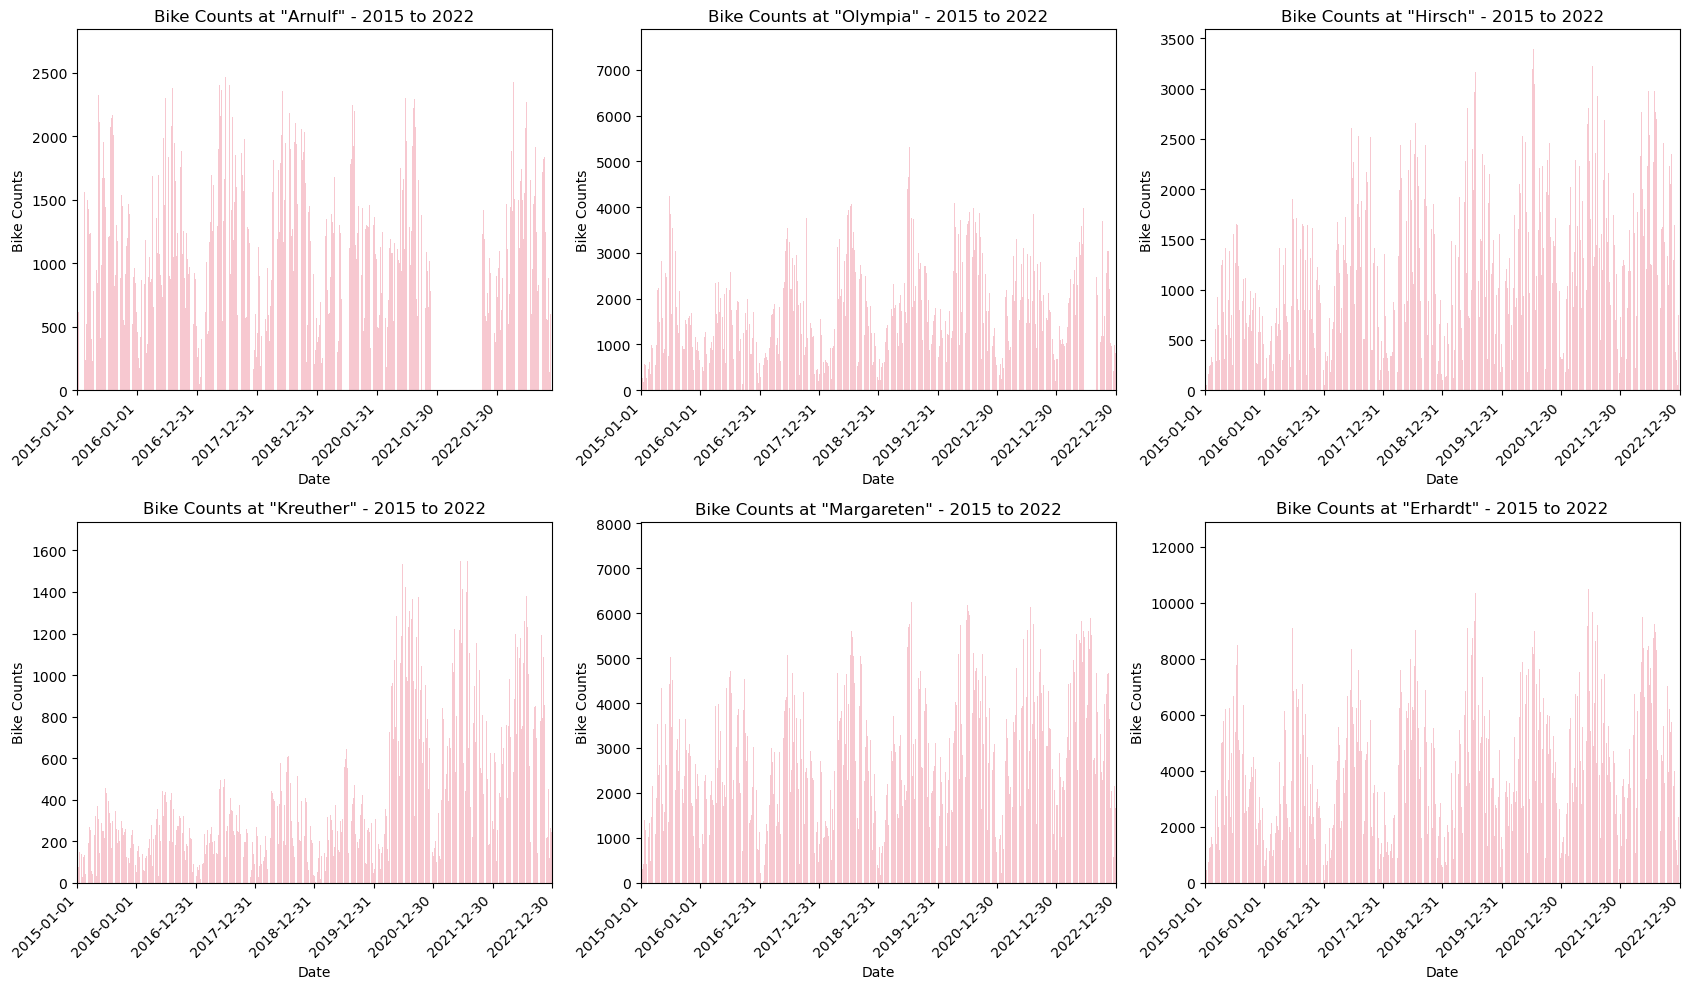

In [29]:
# Create a figure and six subplots
fig, axs = plt.subplots(2, 3, figsize=(17, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each unique location
for i, location in enumerate(unique_locations):
    # Filter the DataFrame for the current location
    df_location = df_munich[df_munich['zaehlstelle'] == location]

    # Plotting
    # Set the current subplot
    plt.sca(axs[i])

    # Plot bike counts as a bar plot in grey color
    sns.barplot(data=df_location, x=df_location['datum'].dt.date, y='gesamt', color='pink')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    # Adjust layout to prevent overlap
    plt.gca().xaxis.set_major_locator(MultipleLocator(365))

    # Add title and labels
    plt.title(f'Bike Counts at "{location}" - 2015 to 2022')
    plt.xlabel('Date')
    plt.ylabel('Bike Counts')


plt.tight_layout()

# Show plot
plt.show()


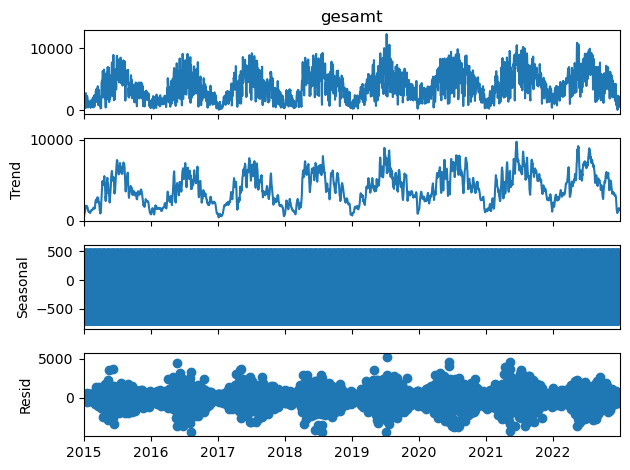

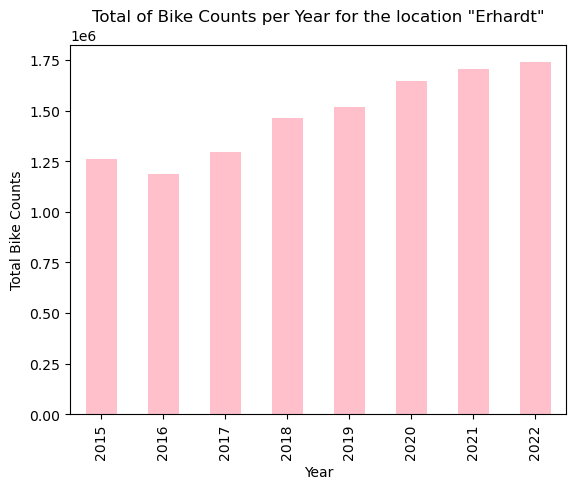

In [39]:
# Now let's perform seasonal decomposition for a specific location, for example, 'Erhardt'
df_location_erhardt = df_munich[df_munich['zaehlstelle'] == 'Erhardt']
res = sm.tsa.seasonal_decompose(df_location_erhardt.set_index('datum')['gesamt'], model='additive')
res.plot()

plt.show()

# Yearly aggregation
yearly_data = df_location_erhardt.groupby(df_location_erhardt['datum'].dt.year)['gesamt'].sum()
yearly_data.plot(kind='bar', xlabel='Year', ylabel='Total Bike Counts', color='pink', title='Total of Bike Counts per Year for the location "Erhardt"')
plt.show()

/var/folders/ch/91lhzbmj5qz7s7pzsvt5_5t00000gn/T/ipykernel_41341/3814748754.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_location_kreuther['gesamt'] = df_location_kreuther['gesamt'].fillna(0)


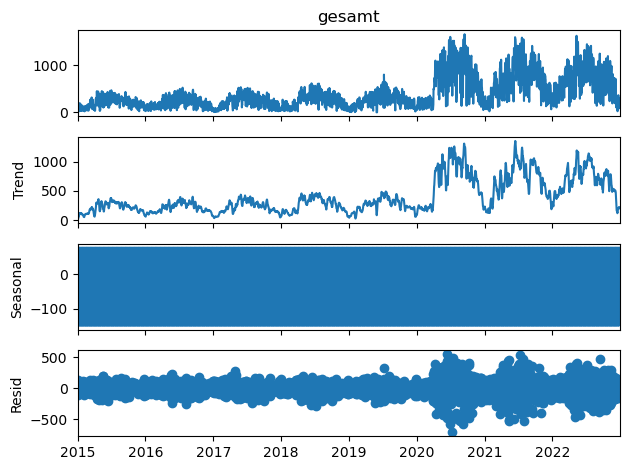

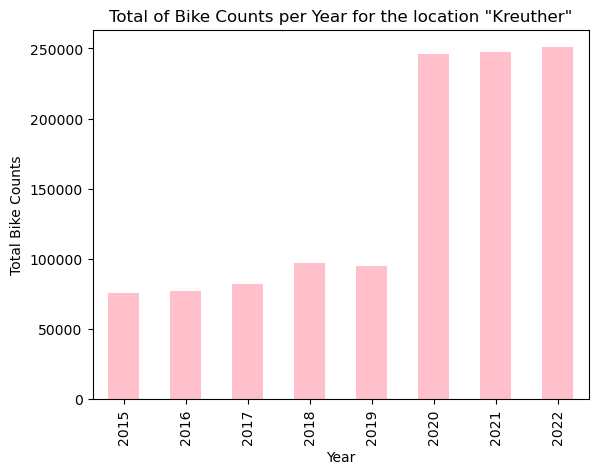

In [42]:
# Now let's perform seasonal decomposition for a specific location, for example, 'kreuther'
df_location_kreuther = df_munich[df_munich['zaehlstelle'] == 'Kreuther']

# Fill missing values with 0
df_location_kreuther['gesamt'] = df_location_kreuther['gesamt'].fillna(0)

res = sm.tsa.seasonal_decompose(df_location_kreuther.set_index('datum')['gesamt'], model='additive')
res.plot()

plt.show()

# Yearly aggregation
yearly_data = df_location_kreuther.groupby(df_location_kreuther['datum'].dt.year)['gesamt'].sum()
yearly_data.plot(kind='bar', xlabel='Year', ylabel='Total Bike Counts', color='pink', title='Total of Bike Counts per Year for the location "Kreuther"')
plt.show()

/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

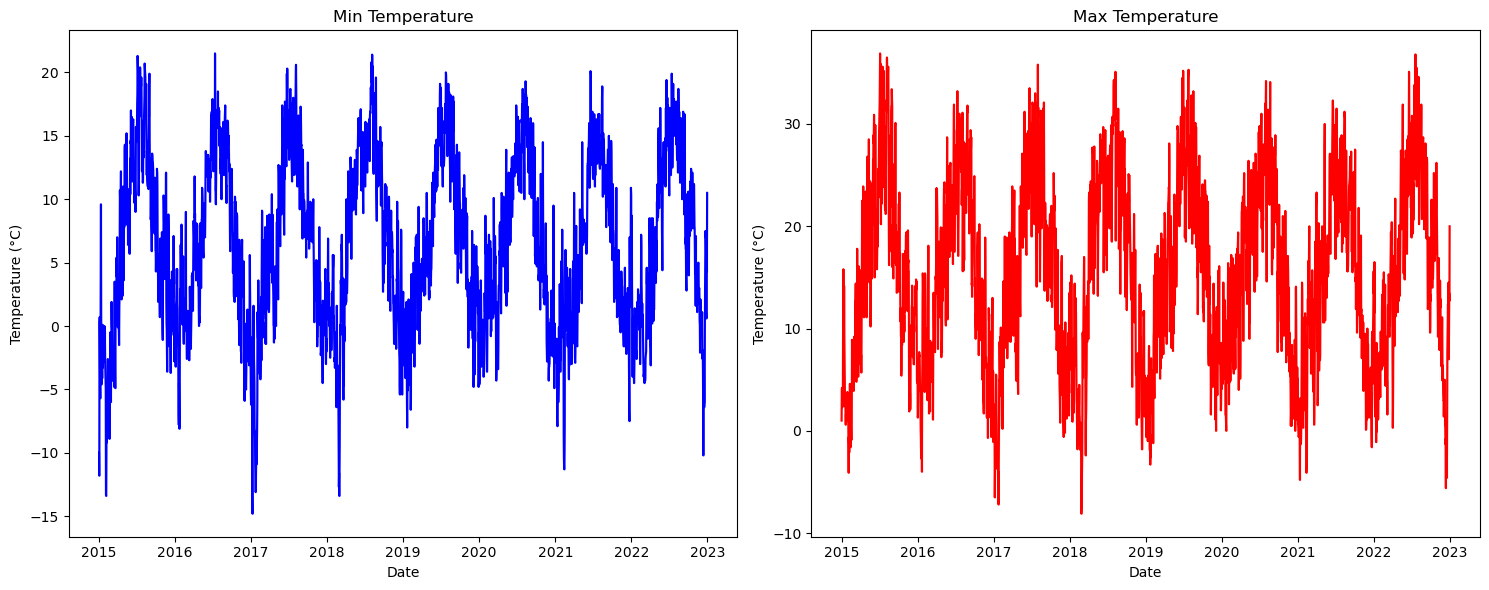

In [43]:
# Convert 'datum' column to datetime
df_munich['datum'] = pd.to_datetime(df_munich['datum'])

# Create a figure with two subplots for temperature
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot min temperature
sns.lineplot(data=df_munich, x='datum', y='min.temp', ax=axs[0], color='blue')
axs[0].set_title('Min Temperature')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Temperature (°C)')

# Plot max temperature
sns.lineplot(data=df_munich, x='datum', y='max.temp', ax=axs[1], color='red')
axs[1].set_title('Max Temperature')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Temperature (°C)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

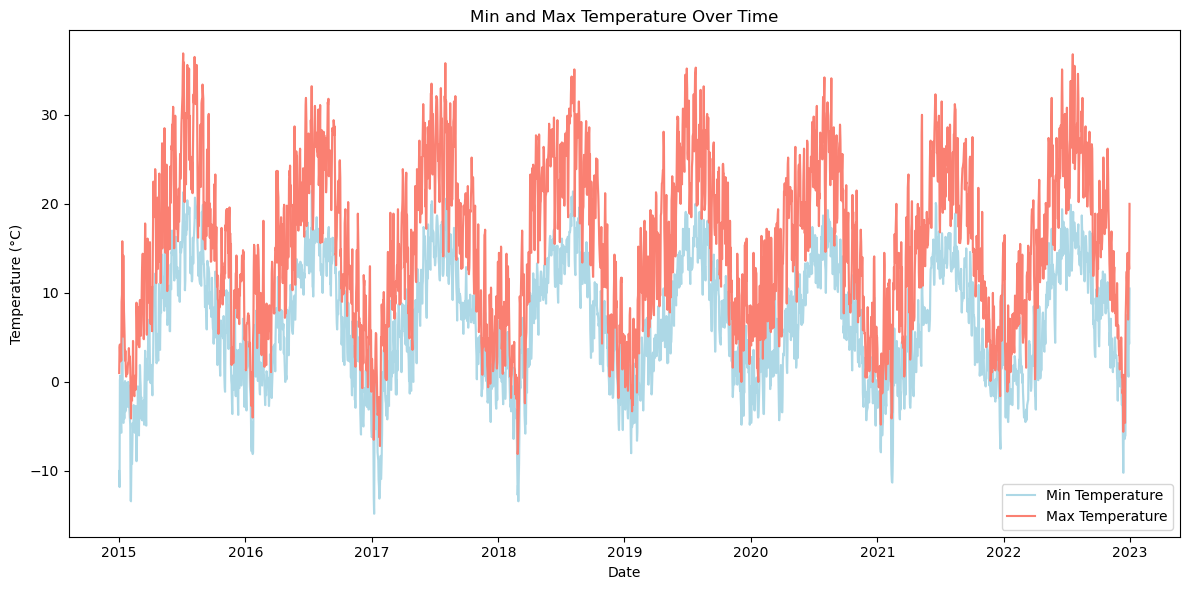

In [46]:
# Convert 'datum' column to datetime
df_munich['datum'] = pd.to_datetime(df_munich['datum'])

# Create a figure for temperature plot
plt.figure(figsize=(12, 6))

# Plot min temperature
sns.lineplot(data=df_munich, x='datum', y='min.temp', color='lightblue', label='Min Temperature')

# Plot max temperature
sns.lineplot(data=df_munich, x='datum', y='max.temp', color='salmon', label='Max Temperature')

# Set title and labels
plt.title('Min and Max Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Show legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
